In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [117]:
# Clusters dasta
clusters = [
    {"mean": [-6, 8], "cov": [[0.4, 0], [0, 0.4]]},
    {"mean": [-4, 7], "cov": [[1, 2], [2, 5]]},
    {"mean": [8, -6], "cov": [[0.4, 0], [0, 0.4]]},
    {"mean": [4, -10], "cov": [[1, 2], [2, 5]]}
]

# Generate the dta points
data = []
for cluster in clusters:
    points = np.random.multivariate_normal(cluster["mean"], cluster["cov"], 100)
    data.append(points)

# Concatenate all data points
data = np.vstack(data)

In [118]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data)
initial_means = kmeans.cluster_centers_
labels = kmeans.labels_

# Apply GMM
gmm_kmeans = GaussianMixture(n_components=4, covariance_type='full', means_init=initial_means)
gmm_kmeans.fit(data)

GaussianMixture(means_init=array([[  7.52336208,  -6.17931773],
       [ -5.07193198,   8.11708263],
       [  3.59849256, -10.99847214],
       [ -4.80271937,   4.90059748]]),
                n_components=4)

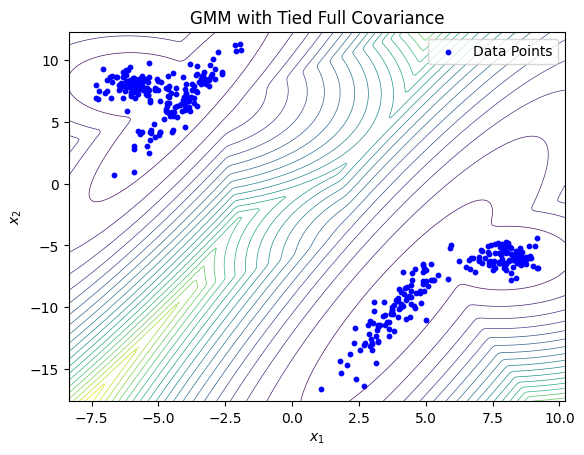

In [119]:
# Generate a mesh grid to plot the GMM contours
x = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 200)
y = np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 200)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

# Calculate the GMM's density for each point on the grid
Z = -gmm_kmeans.score_samples(XX)
Z = Z.reshape(X.shape)

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], s=10, color='blue', label="Data Points")
plt.contour(X, Y, Z, levels=20, cmap="viridis", linewidths=0.5)
plt.title("GMM with Tied Full Covariance")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()